# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*



## Polynomial model generalization exercises

Tasks: 

1. Evaluate infulence of the training data size on model generalization. 

2. Evaluate infulence of data noise on the model generalization. 

3. Generalize the polynomial model by simplification from high degree (top-down approach).


In [16]:
# Libraries 
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
import sklearn
from sklearn.metrics import mean_squared_error



### Sample data

In [3]:
# Generate data 
def fun(x, noise):
    """Underlying function"""
    return .6 * np.sin(x*6) + x + (x ** .8) * noise

# Generate training & testing data
def train_test_data(n_samples, noise_factor): 
    """Function to generate training and testing sets"""
    
    # train 
    np.random.seed(0)
    X_train = np.sort(np.random.rand(n_samples))
    noise_train = np.random.rand(n_samples) * noise_factor
    y_train = fun(X_train, noise_train) 
    X_train = X_train.reshape(-1, 1)
    
    # test 
    X_test = np.sort(np.random.rand(n_samples))
    noise_test = np.random.rand(n_samples) * noise_factor
    y_test = fun(X_test, noise_test)
    X_test = X_test.reshape(-1, 1)
    
    return X_train, y_train, X_test, y_test

In [4]:
# prepare data 
n_samples = 10
noise_factor = 0.9 # quite some noise

X_train, y_train, X_test, y_test = train_test_data(n_samples, noise_factor)

In [5]:
# Underlaying function
X_fun = np.linspace(0, 1, 100)
noise_fun = np.ones(100) / 2. * noise_factor
y_fun = fun(X_fun, noise_fun)

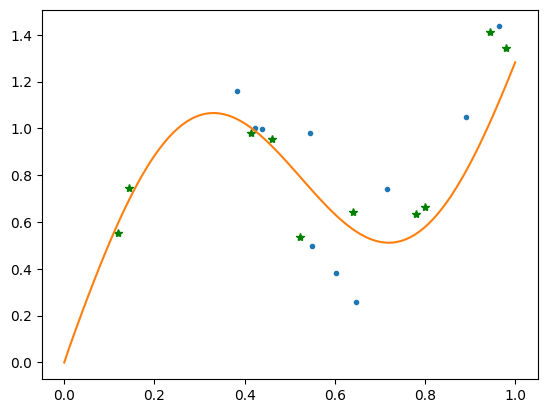

In [9]:
# Plot the data and underlaying function 
plt.plot(X_train, y_train, ".")
plt.plot(X_test, y_test, "g*")
plt.plot(X_fun, y_fun)

In [20]:
# Fit polynomial model (degree = 10)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=10, include_bias=False)
polynomial_features = poly.fit_transform(X_train.reshape(-1,1))

In [21]:
# Evaluate the model - training error 

# instantiate linear regression model 
linear_regression = LinearRegression()
# fit the model 
linear_regression.fit(polynomial_features, y_train) 

train_pred = linear_regression.predict(polynomial_features)
MSE_train = mean_squared_error(y_train, train_pred)
print(f"MSE train: {round(MSE_train, 3)}")

MSE train: 0.0


In [22]:
# Test error 
test_features = poly.fit_transform(X_test.reshape(-1,1))
test_pred = linear_regression.predict(test_features)
MSE_test = mean_squared_error(y_test, test_pred) 
print(f"MSE test: {round(MSE_test, 3)}")

MSE test: 13867580384.63


In [ ]:
# How well is the model generlized? 

Text(0.5, 1.0, 'Degree: 10, MSE train: 0.0, MSE test: 13867580384.63')

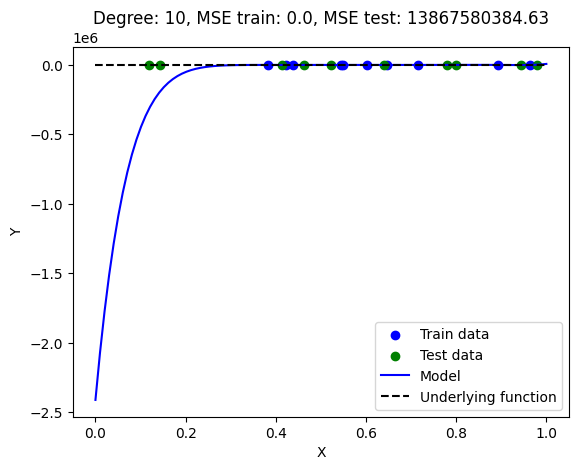

In [23]:
# Plot the model with the data? 
degree = 10
# Model data
X_plot = np.linspace(0, 1, 100)
plot_polynomial_features = poly.fit_transform(X_plot.reshape(-1, 1))
y_plot = linear_regression.predict(plot_polynomial_features)

# Underlying function data
X_fun = np.linspace(0, 1, 100)
noise_fun = np.ones(100) / 2. * noise_factor
y_fun = fun(X_fun, noise_fun)

plt.scatter(X_train, y_train, c="b", label="Train data")
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.plot(X_plot, y_plot, color="b", label="Model")
plt.plot(X_fun, y_fun, "k--", label="Underlying function")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="best")
plt.title(f"Degree: {degree}, MSE train: {round(MSE_train, 3)}, MSE test: {round(MSE_test, 3)}")
 

### **Exercise 1:** Evaluate the infulence of the data size on model generalization
* Increse the parameter `n_samples` from 10 to 50, 100, 200, and 500
* What is the effect of training data size on its model performance while using model of higher degree than needed? 
* How importan is to have enough samples? 

In [35]:
# set size of the samples
# train model 
# evaluate model  
noise_factor = 0.9
degree = 10
n_samples = 500 # update 

# prepare data
X_train, y_train, X_test, y_test = train_test_data(n_samples, noise_factor)

# Fit polynomial model
poly = PolynomialFeatures(degree=degree, include_bias=False)
polynomial_features = poly.fit_transform(X_train.reshape(-1,1))

# Evaluate the model - training error 

# instantiate linear regression model 
linear_regression = LinearRegression()
# fit the model 
linear_regression.fit(polynomial_features, y_train) 

train_pred = linear_regression.predict(polynomial_features)
MSE_train = mean_squared_error(y_train, train_pred)
print(f"MSE train: {round(MSE_train, 3)}")

# Test error 
test_features = poly.fit_transform(X_test.reshape(-1,1))
test_pred = linear_regression.predict(test_features)
MSE_test = mean_squared_error(y_test, test_pred) 
print(f"MSE test: {round(MSE_test, 3)}")

MSE train: 0.025
MSE test: 0.029


Text(0.5, 1.0, 'Degree: 10, MSE train: 0.025, MSE test: 0.029')

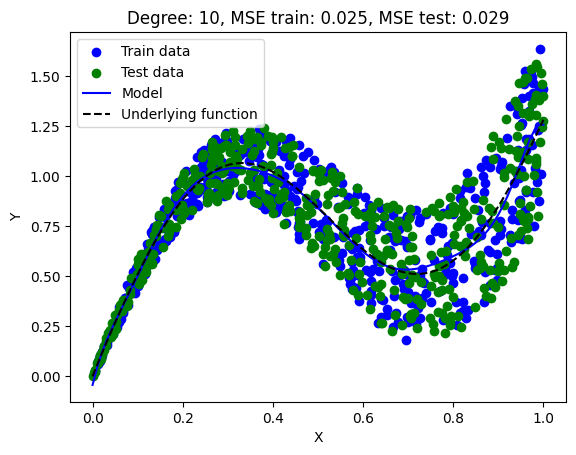

In [36]:
# Plot the model
# Model data
X_plot = np.linspace(0, 1, 100)
plot_polynomial_features = poly.fit_transform(X_plot.reshape(-1, 1))
y_plot = linear_regression.predict(plot_polynomial_features)

# Underlying function data
X_fun = np.linspace(0, 1, 100)
noise_fun = np.ones(100) / 2. * noise_factor
y_fun = fun(X_fun, noise_fun)

plt.scatter(X_train, y_train, c="b", label="Train data")
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.plot(X_plot, y_plot, color="b", label="Model")
plt.plot(X_fun, y_fun, "k--", label="Underlying function")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="best")
plt.title(f"Degree: {degree}, MSE train: {round(MSE_train, 3)}, MSE test: {round(MSE_test, 3)}")
 

In [ ]:
# What is the effect of incresing sample size on model generalization? 
# Is there any use of the polynomial model for this use case?

### **Exercise 2:** Evaluate the infulence of noise on the model generalization
* Decrese the noise parameter `noise_factor` from 0.9 to 0.5, and 0.1
* What is the effect of noise in the training data on model generalization? 
* Next, increase  the parameter `n_samples` from to 200 and keep `noise_factor` at 10% = 0.1. How does the model look?  

In [43]:
noise_factor = 0.1
degree = 10
n_samples = 20 

# run the model 

# prepare data
X_train, y_train, X_test, y_test = train_test_data(n_samples, noise_factor)

# Fit polynomial model
poly = PolynomialFeatures(degree=degree, include_bias=False)
polynomial_features = poly.fit_transform(X_train.reshape(-1,1))

# Evaluate the model - training error 

# instantiate linear regression model 
linear_regression = LinearRegression()
# fit the model 
linear_regression.fit(polynomial_features, y_train) 

train_pred = linear_regression.predict(polynomial_features)
MSE_train = mean_squared_error(y_train, train_pred)
print(f"MSE train: {round(MSE_train, 5)}")

# Test error 
test_features = poly.fit_transform(X_test.reshape(-1,1))
test_pred = linear_regression.predict(test_features)
MSE_test = mean_squared_error(y_test, test_pred) 
print(f"MSE test: {round(MSE_test, 5)}")

MSE train: 0.00019
MSE test: 0.00127


Text(0.5, 1.0, 'Degree: 10, MSE train: 0.00019, MSE test: 0.00127')

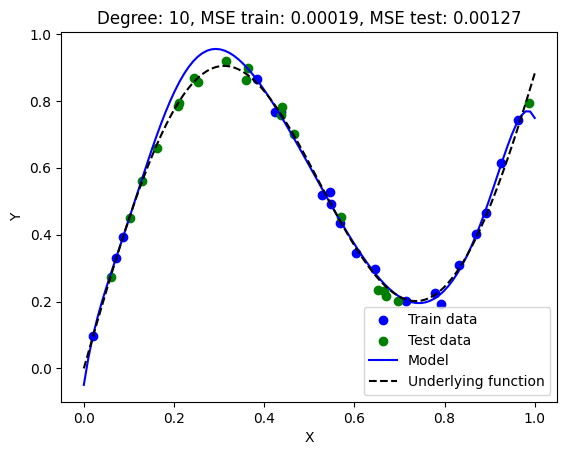

In [45]:
# Plot the model
X_plot = np.linspace(0, 1, 100)
plot_polynomial_features = poly.fit_transform(X_plot.reshape(-1, 1))
y_plot = linear_regression.predict(plot_polynomial_features)

# Underlying function data
X_fun = np.linspace(0, 1, 100)
noise_fun = np.ones(100) / 2. * noise_factor
y_fun = fun(X_fun, noise_fun)

plt.scatter(X_train, y_train, c="b", label="Train data")
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.plot(X_plot, y_plot, color="b", label="Model")
plt.plot(X_fun, y_fun, "k--", label="Underlying function")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="best")
plt.title(f"Degree: {degree}, MSE train: {round(MSE_train, 5)}, MSE test: {round(MSE_test, 5)}")
  

In [ ]:
# Evaluate the results 

### **Exercise 3:** Simplify the model for better generalization
* Decrese the degree of polynomial of model`deg` from 10 to reasonable number, so the difference between testing and training model is minimized. 


In [59]:
noise_factor = 0.5
degree = 4
n_samples = 30 
# run the model 

# prepare data
X_train, y_train, X_test, y_test = train_test_data(n_samples, noise_factor)

# Fit polynomial model
poly = PolynomialFeatures(degree=degree, include_bias=False)
polynomial_features = poly.fit_transform(X_train.reshape(-1,1))

# Evaluate the model - training error 

# instantiate linear regression model 
linear_regression = LinearRegression()
# fit the model 
linear_regression.fit(polynomial_features, y_train) 

train_pred = linear_regression.predict(polynomial_features)
MSE_train = mean_squared_error(y_train, train_pred)
print(f"MSE train: {round(MSE_train, 5)}")

# Test error 
test_features = poly.fit_transform(X_test.reshape(-1,1))
test_pred = linear_regression.predict(test_features)
MSE_test = mean_squared_error(y_test, test_pred) 
print(f"MSE test: {round(MSE_test, 5)}") 

MSE train: 0.00821
MSE test: 0.00841


Text(0.5, 1.0, 'Degree: 4, MSE train: 0.00821, MSE test: 0.00841')

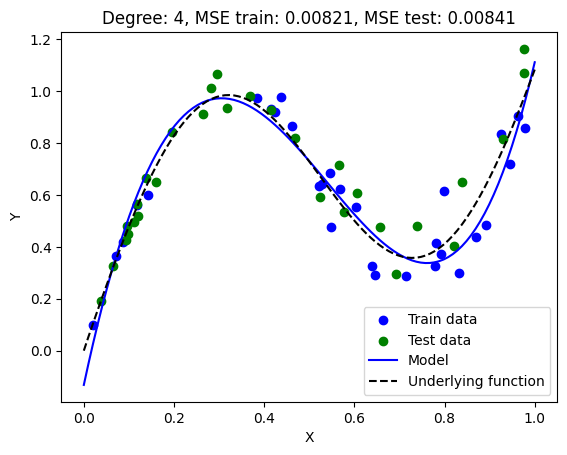

In [60]:
# Plot the model
X_plot = np.linspace(0, 1, 100)
plot_polynomial_features = poly.fit_transform(X_plot.reshape(-1, 1))
y_plot = linear_regression.predict(plot_polynomial_features)

# Underlying function data
X_fun = np.linspace(0, 1, 100)
noise_fun = np.ones(100) / 2. * noise_factor
y_fun = fun(X_fun, noise_fun)

plt.scatter(X_train, y_train, c="b", label="Train data")
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.plot(X_plot, y_plot, color="b", label="Model")
plt.plot(X_fun, y_fun, "k--", label="Underlying function")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="best")
plt.title(f"Degree: {degree}, MSE train: {round(MSE_train, 5)}, MSE test: {round(MSE_test, 5)}")
 

In [ ]:
# Evaluate the results